In [38]:
import os
import mne
import mne_bids
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
from mne_bids import BIDSPath, find_matching_paths, make_report, print_dir_tree, read_raw_bids

In [39]:
print('MNE–Python version', mne.__version__)
print('MNE–BIDS version', mne_bids.__version__)

MNE–Python version 1.9.0
MNE–BIDS version 0.16.0


# Test on single participant, single task, single run

### define inputs

In [20]:
sub_label = '21'
task_label = 'passive'
run_label = '1'

In [21]:
#bids_root = os.path.join('/Users/dsj3886/data_local/',
#                        'EAM1_local/data-bids')
bids_root = os.path.join('/Users/dsj3886/data_local/',
                        'EAM1/data-bids')

print_dir_tree(bids_root)

|data-bids/
|--- .DS_Store
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-21/
|------ .DS_Store
|------ sub-21_scans.tsv
|------ eeg/
|--------- sub-21_task-active_run-1_channels.tsv
|--------- sub-21_task-active_run-1_eeg.bdf
|--------- sub-21_task-active_run-1_eeg.json
|--------- sub-21_task-active_run-1_events.json
|--------- sub-21_task-active_run-1_events.tsv
|--------- sub-21_task-active_run-2_channels.tsv
|--------- sub-21_task-active_run-2_eeg.bdf
|--------- sub-21_task-active_run-2_eeg.json
|--------- sub-21_task-active_run-2_events.json
|--------- sub-21_task-active_run-2_events.tsv
|--------- sub-21_task-active_run-3_channels.tsv
|--------- sub-21_task-active_run-3_eeg.bdf
|--------- sub-21_task-active_run-3_eeg.json
|--------- sub-21_task-active_run-3_events.json
|--------- sub-21_task-active_run-3_events.tsv
|--------- sub-21_task-active_run-4_channels.tsv
|--------- sub-21_task-active_run-4_eeg.bdf
|--------- sub-21_task-ac

In [22]:
print(make_report(bids_root))

Summarizing participants.tsv /Users/dsj3886/data_local/EAM1/data-bids/participants.tsv...
Summarizing scans.tsv files [PosixPath('/Users/dsj3886/data_local/EAM1/data-bids/sub-21/sub-21_scans.tsv')]...
The participant template found: sex were all unknown;
handedness were all unknown;
ages all unknown
 The [Unspecified] dataset was created by [Unspecified1], and [Unspecified2] and
conforms to BIDS version 1.7.0. This report was generated with MNE-BIDS
(https://doi.org/10.21105/joss.01896). The dataset consists of 1 participants
(sex were all unknown; handedness were all unknown; ages all unknown) . Data was
recorded using an EEG system (Biosemi) sampled at 16384.0 Hz with line noise at
n/a Hz. There were 8 scans in total. Recording durations ranged from 430.0 to
746.0 seconds (mean = 606.75, std = 94.01), for a total of 4854.0 seconds of
data recorded over all scans. For each dataset, there were on average 5.0 (std =
0.0) recording channels per scan, out of which 5.0 (std = 0.0) were use

In [85]:
bids_paths = find_matching_paths(bids_root, 
                                 datatypes='eeg', 
                                 extensions=['.bdf', '.tsv'])

In [86]:
bids_paths

[BIDSPath(
 root: /Users/dsj3886/data_local/EAM1/data-bids
 datatype: eeg
 basename: sub-21_task-active_run-1_channels.tsv),
 BIDSPath(
 root: /Users/dsj3886/data_local/EAM1/data-bids
 datatype: eeg
 basename: sub-21_task-active_run-1_eeg.bdf),
 BIDSPath(
 root: /Users/dsj3886/data_local/EAM1/data-bids
 datatype: eeg
 basename: sub-21_task-active_run-1_events.tsv),
 BIDSPath(
 root: /Users/dsj3886/data_local/EAM1/data-bids
 datatype: eeg
 basename: sub-21_task-active_run-2_channels.tsv),
 BIDSPath(
 root: /Users/dsj3886/data_local/EAM1/data-bids
 datatype: eeg
 basename: sub-21_task-active_run-2_eeg.bdf),
 BIDSPath(
 root: /Users/dsj3886/data_local/EAM1/data-bids
 datatype: eeg
 basename: sub-21_task-active_run-2_events.tsv),
 BIDSPath(
 root: /Users/dsj3886/data_local/EAM1/data-bids
 datatype: eeg
 basename: sub-21_task-active_run-3_channels.tsv),
 BIDSPath(
 root: /Users/dsj3886/data_local/EAM1/data-bids
 datatype: eeg
 basename: sub-21_task-active_run-3_eeg.bdf),
 BIDSPath(
 root: /

In [78]:
bids_path = BIDSPath(root=bids_root, datatype='eeg')

In [79]:
bids_path = bids_path.update(subject=sub_label)#, task=task_label, run=run_label)

In [80]:
bids_path.match()

[BIDSPath(
 root: /Users/dsj3886/data_local/EAM1/data-bids
 datatype: eeg
 basename: sub-21_task-active_run-1_channels.tsv),
 BIDSPath(
 root: /Users/dsj3886/data_local/EAM1/data-bids
 datatype: eeg
 basename: sub-21_task-active_run-1_eeg.bdf),
 BIDSPath(
 root: /Users/dsj3886/data_local/EAM1/data-bids
 datatype: eeg
 basename: sub-21_task-active_run-1_events.tsv),
 BIDSPath(
 root: /Users/dsj3886/data_local/EAM1/data-bids
 datatype: eeg
 basename: sub-21_task-active_run-2_channels.tsv),
 BIDSPath(
 root: /Users/dsj3886/data_local/EAM1/data-bids
 datatype: eeg
 basename: sub-21_task-active_run-2_eeg.bdf),
 BIDSPath(
 root: /Users/dsj3886/data_local/EAM1/data-bids
 datatype: eeg
 basename: sub-21_task-active_run-2_events.tsv),
 BIDSPath(
 root: /Users/dsj3886/data_local/EAM1/data-bids
 datatype: eeg
 basename: sub-21_task-active_run-3_channels.tsv),
 BIDSPath(
 root: /Users/dsj3886/data_local/EAM1/data-bids
 datatype: eeg
 basename: sub-21_task-active_run-3_eeg.bdf),
 BIDSPath(
 root: /

### load EEG data

In [28]:
data = read_raw_bids(bids_path=bids_path, verbose=False)
data = data.load_data()

Reading 0 ... 9928703  =      0.000 ...   606.000 secs...


In [29]:
print(data.annotations)

<Annotations | 1199 segments: passive/neg (599), passive/pos (600)>


In [30]:
print(data.info)

<Info | 10 non-empty values
 bads: []
 ch_names: M1, M2, Cz, Erg1, Status
 chs: 4 EEG, 1 Stimulus
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 experimenter: mne_anonymize
 highpass: 0.0 Hz
 lowpass: 3334.0 Hz
 meas_date: 2025-01-08 13:43:35 UTC
 nchan: 5
 projs: []
 sfreq: 16384.0 Hz
 subject_info: <subject_info | his_id: sub-21, sex: 0, hand: 0>
>


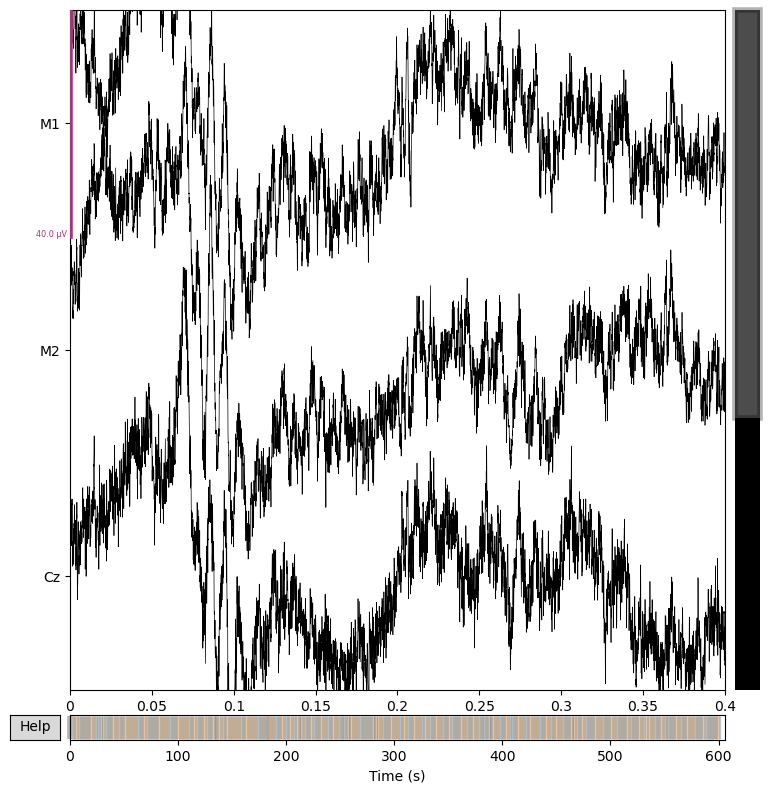

In [32]:
data.plot(duration=0.4, 
          n_channels=3,
          remove_dc=True);

### set reference channels

In [33]:
data_ref = data.set_eeg_reference(ref_channels=['M1', 'M2'])

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


In [34]:
print(data_ref.info)

<Info | 11 non-empty values
 bads: []
 ch_names: M1, M2, Cz, Erg1, Status
 chs: 4 EEG, 1 Stimulus
 custom_ref_applied: True
 description: Anonymized using a time shift to preserve age at acquisition
 experimenter: mne_anonymize
 highpass: 0.0 Hz
 lowpass: 3334.0 Hz
 meas_date: 2025-01-08 13:43:35 UTC
 nchan: 5
 projs: []
 sfreq: 16384.0 Hz
 subject_info: <subject_info | his_id: sub-21, sex: 0, hand: 0>
>


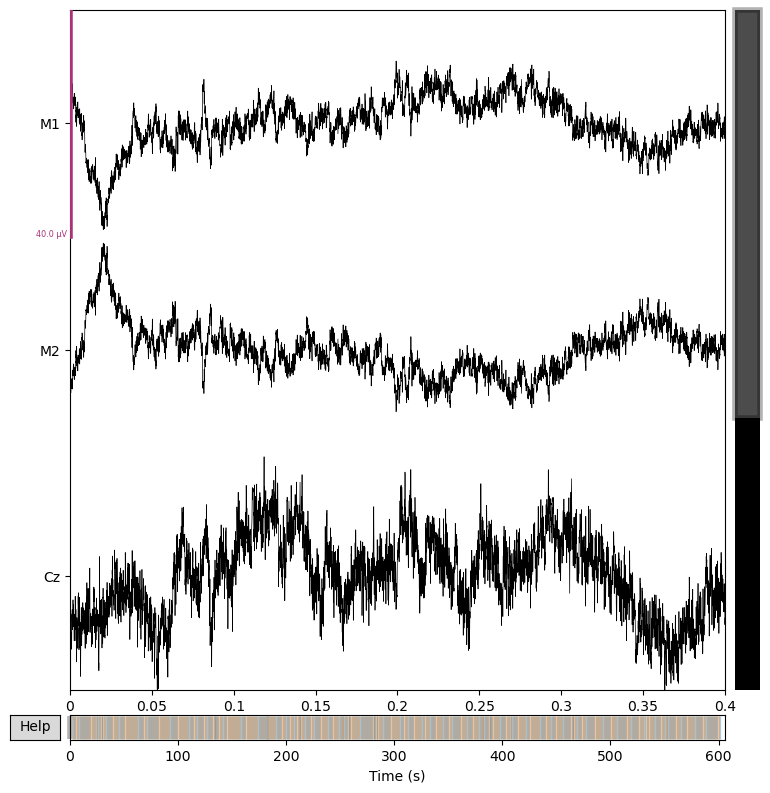

In [35]:
data_ref.plot(duration=0.4, 
              n_channels=3, 
              remove_dc=True);

### filter data

In [36]:
data_filtered = data_ref.copy().filter(l_freq = 65, h_freq = 2000)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)



In [19]:
data_filtered

<RawEDF | sub-21_task-passive_run-1_eeg.bdf, 5 x 9928704 (606.0 s), ~378.8 MB, data loaded>

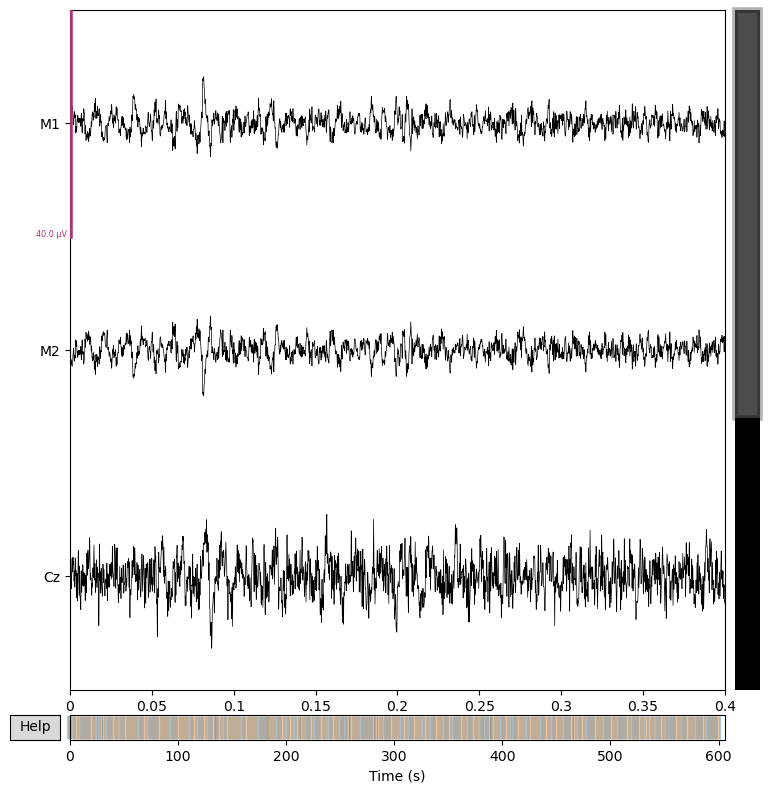

In [37]:
data_filtered.plot(duration=0.4, 
                   n_channels=3, 
                   remove_dc=True);

### Find events in the trigger channel

In [21]:
events = mne.find_events(data_filtered, 
                         stim_channel='Status', 
                         initial_event=True)

1202 events found on stim channel Status
Event IDs: [    1     2   130   254 65536]


In [22]:
# unique_events, unique_indices, unique_inverse, count_events = 
unique, counts = np.unique(events[:,2], return_counts=True)
print(unique)
print(counts)


[    1     2   130   254 65536]
[600 599   1   1   1]


In [23]:
for tx, trigger in enumerate(unique):
    print(f'trigger code {trigger} – {counts[tx]} events')

trigger code 1 – 600 events
trigger code 2 – 599 events
trigger code 130 – 1 events
trigger code 254 – 1 events
trigger code 65536 – 1 events


In [24]:
event_dict = {'pol_pos': 1, #2049,
              'pol_neg': 2, #2050,
              #'button_1': 7, #6144,
              #'button_2': 6145,
              #'button_3': 6149,
              }

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_73712/2210850885.py:1: RuntimeWarning: event 254 missing from event_id will be ignored
  fig = mne.viz.plot_events(
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_73712/2210850885.py:1: RuntimeWarning: event 65536 missing from event_id will be ignored
  fig = mne.viz.plot_events(


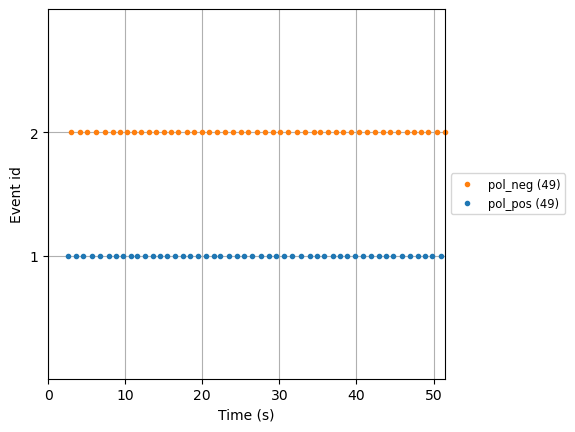

In [25]:
fig = mne.viz.plot_events(
            events[:100], event_id=event_dict, 
            sfreq=data_filtered.info["sfreq"], 
            first_samp=data_filtered.first_samp
)

### Epoch the data based on events

In [26]:
epochs = mne.Epochs(data_filtered, 
                    events, 
                    event_id=event_dict,
                    picks=['Cz'],
                    tmin=-0.05, tmax=0.4, 
                    baseline=[-0.05, 0],
                    reject=dict(eeg=75e-6)).drop_bad()


Not setting metadata
1199 matching events found
Setting baseline interval to [-0.05, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1199 events and 7374 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
17 bad epochs dropped


In [27]:
print(epochs.info)

<Info | 11 non-empty values
 bads: []
 ch_names: Cz
 chs: 1 EEG
 custom_ref_applied: True
 description: Anonymized using a time shift to preserve age at acquisition
 experimenter: mne_anonymize
 highpass: 65.0 Hz
 lowpass: 2000.0 Hz
 meas_date: 2025-01-08 13:43:35 UTC
 nchan: 1
 projs: []
 sfreq: 16384.0 Hz
 subject_info: 3 items (dict)
>


You seem to have overlapping epochs. Some event lines may be duplicated in the plot.
Using data from preloaded Raw for 5 events and 7374 original time points ...


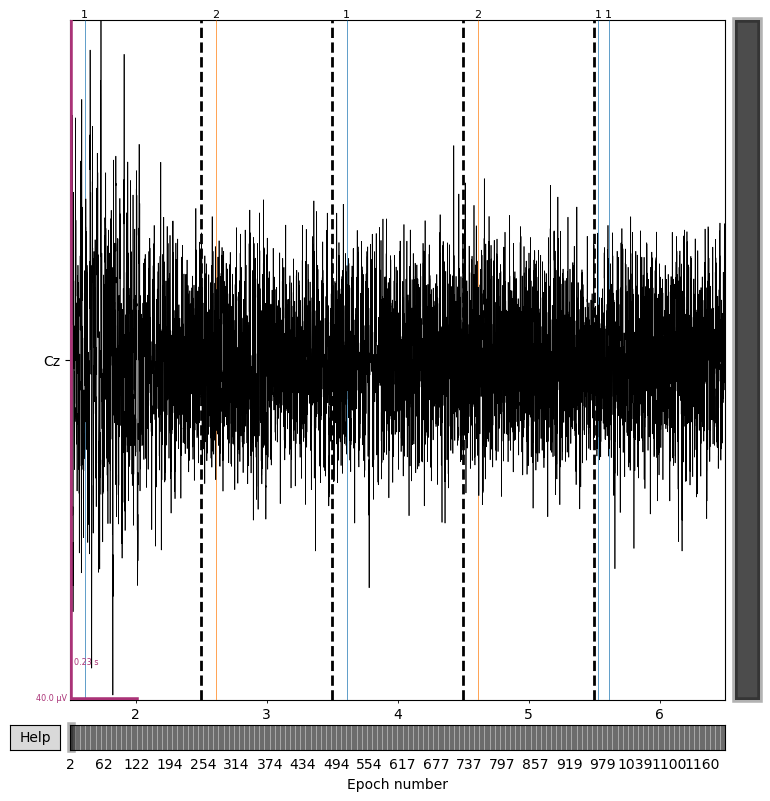

In [28]:
# plot the first few epochs
epochs.plot(n_epochs = 5, 
            events=True);

In [97]:
# save epoched data to a new file
#epochs.save(f'sub-{sub_label}_task-{task_label}_run-{run_label}_epochs.fif', overwrite = True)

Using data from preloaded Raw for 1 events and 5571 original time points ...
Using data from preloaded Raw for 2210 events and 5571 original time points ...


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_28520/1753865263.py:2: RuntimeWarning: This filename (sub-12_task-active_run-1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(f'sub-{sub_label}_task-{task_label}_run-{run_label}_epochs.fif', overwrite = True)


In [51]:
'''%matplotlib
#plot erg channel with triggers
#define start
t1start = (events[1,0])/data_filtered.info['sfreq']
tend = events[8,0]/(data_filtered.info['sfreq'])#*5*60) #right now this plots the first 9 epochs
data_filtered.plot(
    events=events,
    start=t1start,
    duration=tend,
    color="gray",
    picks='Erg1'
)
'''

'%matplotlib\n#plot erg channel with triggers\n#define start\nt1start = (events[1,0])/data_filtered.info[\'sfreq\']\ntend = events[8,0]/(data_filtered.info[\'sfreq\'])#*5*60) #right now this plots the first 9 epochs\ndata_filtered.plot(\n    events=events,\n    start=t1start,\n    duration=tend,\n    color="gray",\n    picks=\'Erg1\'\n)\n'

### Created `Evoked` from `Epochs`

#### Across polarities

In [40]:
evoked_all = epochs.average(by_event_type=False)
evoked_all

<Evoked | '0.50 × pol_pos + 0.50 × pol_neg' (average, N=1182), -0.049988 – 0.40002 s, baseline -0.05 – 0 s, 1 ch, ~64 kB>

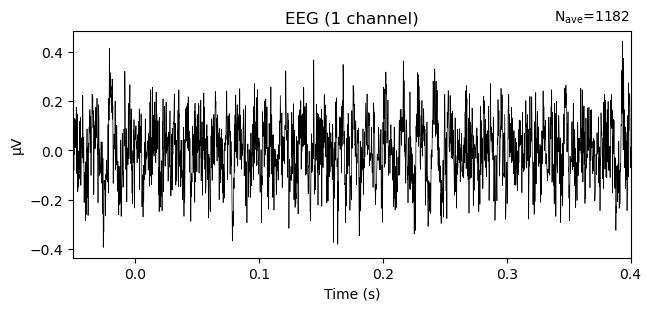

In [44]:
evoked_all.plot(selectable=False);

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/Users/dsj3886/miniconda3/envs/py24/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


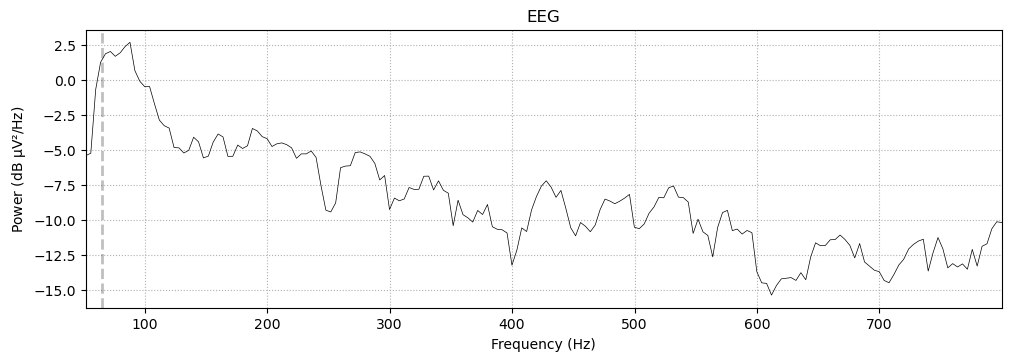

In [45]:
evoked_all_psd = evoked_all.compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
evoked_all_psd.plot(average=True, amplitude=False)

No baseline correction applied


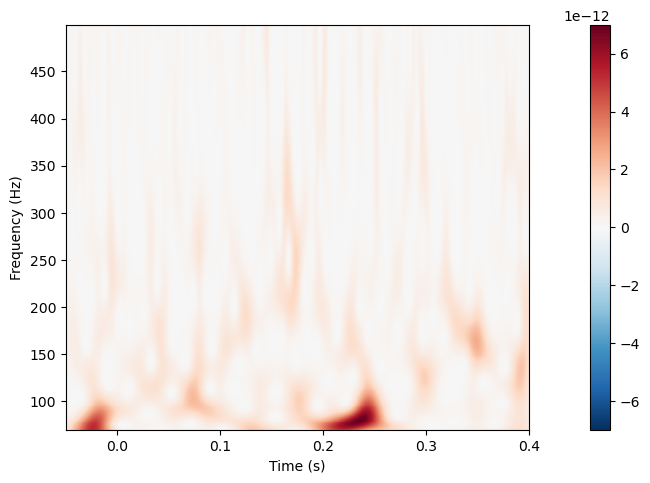

[<Figure size 640x480 with 2 Axes>]

In [47]:
frequencies = np.arange(70,500)
power_all = evoked_all.compute_tfr("morlet", freqs=frequencies)
power_all.plot()

#### By polarity

In [29]:
evoked = epochs.average(by_event_type=True)

In [30]:
evoked

[<Evoked | 'pol_pos' (average, N=591), -0.049988 – 0.40002 s, baseline -0.05 – 0 s, 1 ch, ~64 kB>,
 <Evoked | 'pol_neg' (average, N=591), -0.049988 – 0.40002 s, baseline -0.05 – 0 s, 1 ch, ~64 kB>]

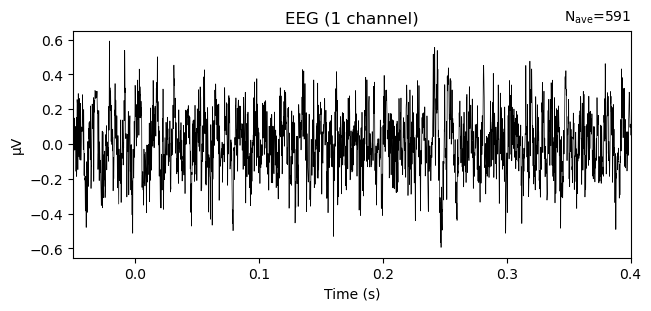

In [31]:
evoked[0].plot(selectable=False);

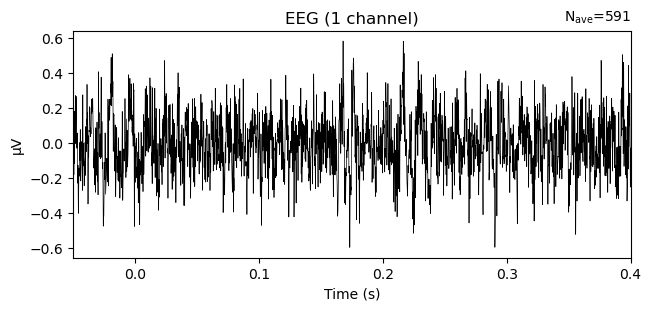

In [32]:
evoked[1].plot(selectable=False);

    Using multitaper spectrum estimation with 7 DPSS windows


Plotting power spectral density (dB=True).


/Users/dsj3886/miniconda3/envs/py24/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


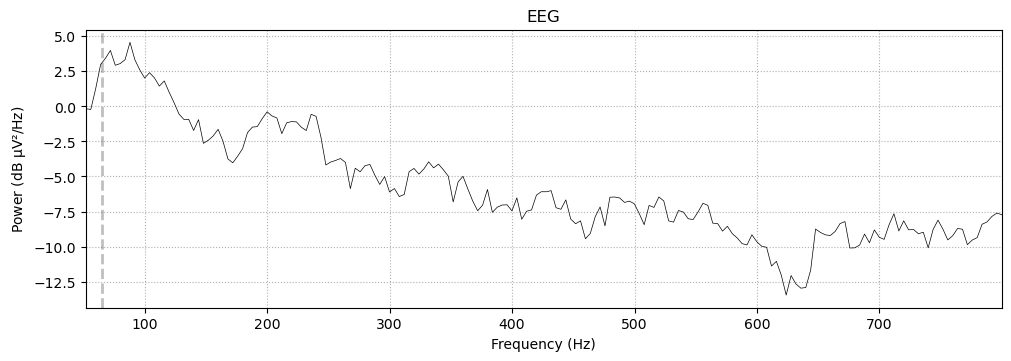

In [33]:
evoked_psd = evoked[0].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
evoked_psd.plot(average=True, amplitude=False)

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/Users/dsj3886/miniconda3/envs/py24/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


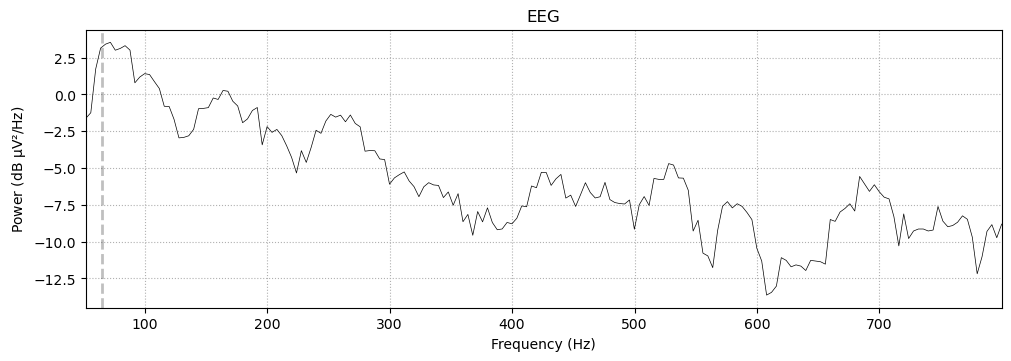

In [34]:
evoked_psd = evoked[1].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
evoked_psd.plot(average=True, amplitude=False)

No baseline correction applied


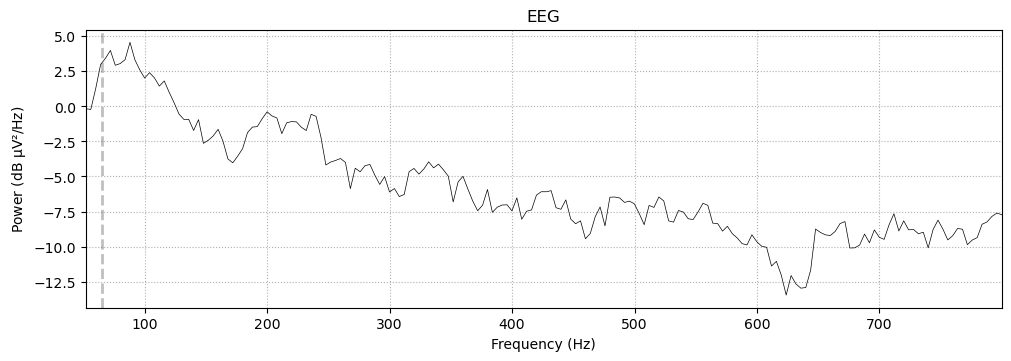

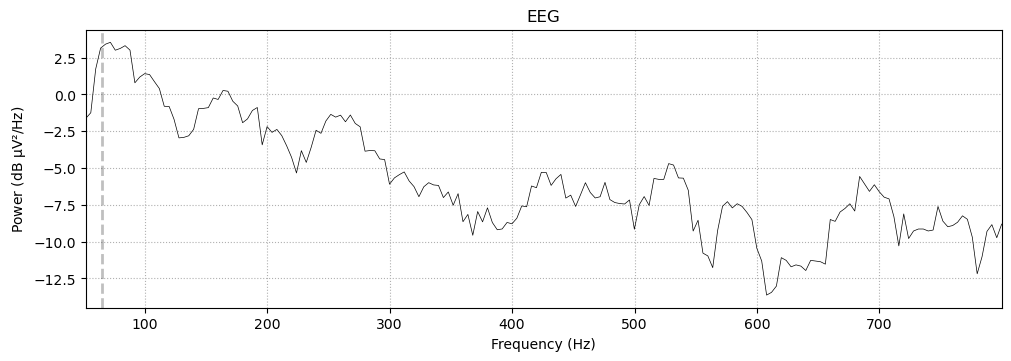

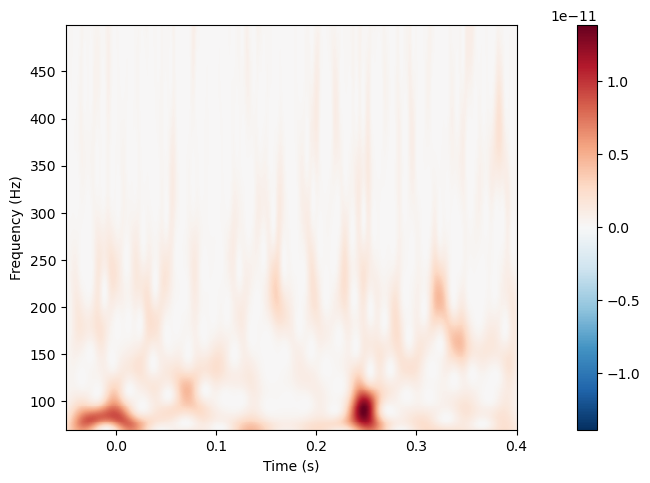

[<Figure size 640x480 with 2 Axes>]

In [35]:
frequencies = np.arange(70,500)
power = evoked[0].compute_tfr("morlet", freqs=frequencies)
power.plot()

No baseline correction applied


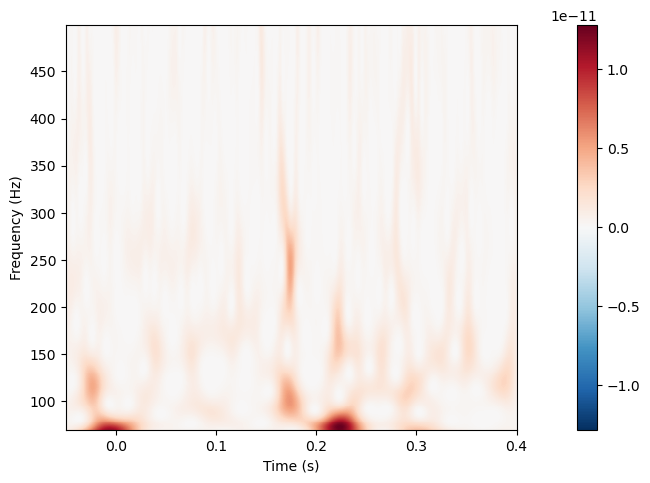

[<Figure size 640x480 with 2 Axes>]

In [36]:
frequencies = np.arange(70,500)
power = evoked[1].compute_tfr("morlet", freqs=frequencies)
power.plot()

# Combine multiple runs (BIDS)

In [66]:
sub_label = '21'
task_list = ['active', 'passive']
#bids_root = os.path.join('/Users/dsj3886/data_local/',
#                        'EAM1_local/data-bids')
bids_root = os.path.join('/Users/dsj3886/data_local/',
                        'EAM1/data-bids')

print_dir_tree(bids_root)


|data-bids/
|--- .DS_Store
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-21/
|------ .DS_Store
|------ sub-21_scans.tsv
|------ eeg/
|--------- sub-21_task-active_run-1_channels.tsv
|--------- sub-21_task-active_run-1_eeg.bdf
|--------- sub-21_task-active_run-1_eeg.json
|--------- sub-21_task-active_run-1_events.json
|--------- sub-21_task-active_run-1_events.tsv
|--------- sub-21_task-active_run-2_channels.tsv
|--------- sub-21_task-active_run-2_eeg.bdf
|--------- sub-21_task-active_run-2_eeg.json
|--------- sub-21_task-active_run-2_events.json
|--------- sub-21_task-active_run-2_events.tsv
|--------- sub-21_task-active_run-3_channels.tsv
|--------- sub-21_task-active_run-3_eeg.bdf
|--------- sub-21_task-active_run-3_eeg.json
|--------- sub-21_task-active_run-3_events.json
|--------- sub-21_task-active_run-3_events.tsv
|--------- sub-21_task-active_run-4_channels.tsv
|--------- sub-21_task-active_run-4_eeg.bdf
|--------- sub-21_task-ac

In [92]:
# define event labels and codes (differs per participant)
if int(sub_label) > 19:
    event_dict = {'passive/pos': 1,
                 'passive/neg': 2,
                 'active/pos': 3,
                 'active/neg': 4}
elif int(sub_label) > 13:
    event_dict = {'pos': 1,
                  'neg': 2,}
elif int(sub_label) < 13:
    print('all active coded as 2049.',
         '  need to fix')
    #event_dict = {'pos': 2049,
    #              'neg': 2050,}

In [93]:
# initialize an empty dictionary for data
task_evoked_dict = {}
event_evoked_dict = {}

for task_label in task_list:
    print(f'Loading {task_label} data')

    bids_paths = find_matching_paths(bids_root, 
                                 datatypes='eeg',
                                 tasks=task_label,
                                 extensions=['.bdf'])

    epoch_list = []

    for rx, bdf_path in enumerate(bids_paths):
        print(f'Loading task-{task_label} run-{rx+1}')

        # load in EEG data
        bids_path = BIDSPath(root=bids_root, datatype='eeg', subject=sub_label, task=task_label, run=run_label)
        data = mne.io.read_raw_bdf(bdf_path, preload=True)
        
        #try:

        # re-reference data to linked mastoid reference
        data_ref = data.set_eeg_reference(ref_channels=['M1', 'M2'])
        
        # filter data
        data_filtered = data_ref.copy().filter(l_freq=65, h_freq=2000)
        
        # find events
        events = mne.find_events(data_filtered, 
                                 stim_channel='Status', 
                                 initial_event=True)
        
        # epoch data based on stimulus events
        epochs = mne.Epochs(data_filtered, 
                            events, 
                            event_id=event_dict,
                            on_missing='warn',
                            picks=['Cz'],
                            tmin=-0.04, tmax=0.4, 
                            baseline=[-0.04, 0],
                            reject=dict(eeg=75e-6)).drop_bad()
        
        epoch_list.append(epochs)

        #except:
        #    print(f"No run {run_label} for task-{task_label}")
    
    # combine epochs across runs
    all_epochs = mne.concatenate_epochs(epoch_list)
    epochs.save(f'../sub-{sub_label}_task-{task_label}_run-all_epochs.fif', overwrite=True)
    
    # create evoked average from across-run epochs
    event_evoked = all_epochs.average(by_event_type=True)
    all_evoked = all_epochs.average()

    # add to results dict
    event_evoked_dict[task_label] = event_evoked
    task_evoked_dict[task_label] = all_evoked



Loading active data
Loading task-active run-1
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1/data-bids/sub-21/eeg/sub-21_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7045119  =      0.000 ...   430.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

3614 events found on stim channel Sta

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:36: RuntimeWarning: No matching events found for passive/pos (event id 1)
  epochs = mne.Epochs(data_filtered,
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:36: RuntimeWarning: No matching events found for passive/neg (event id 2)
  epochs = mne.Epochs(data_filtered,


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

3603 events found on stim channel Status
Event IDs: [    1     3     4     7    10   138 65536 65790]
Not setting metadata
1201 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1201 events and 7210 original time points ..

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:36: RuntimeWarning: No matching events found for passive/neg (event id 2)
  epochs = mne.Epochs(data_filtered,


    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecti

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:36: RuntimeWarning: No matching events found for passive/pos (event id 1)
  epochs = mne.Epochs(data_filtered,
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:36: RuntimeWarning: No matching events found for passive/neg (event id 2)
  epochs = mne.Epochs(data_filtered,


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

3603 events found on stim channel Status
Event IDs: [    3     4     7    10   131   132   135   138 65536 65790]
Not setting metadata
1195 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1195 events and 7210 original ti

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:36: RuntimeWarning: No matching events found for passive/pos (event id 1)
  epochs = mne.Epochs(data_filtered,
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:36: RuntimeWarning: No matching events found for passive/neg (event id 2)
  epochs = mne.Epochs(data_filtered,


    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
118 bad epochs dropped
Using data from preloaded Raw for 1199 events and 7210 original time points ...
Using data from preloaded Raw for 24 events and 7210 original time points ...
Us

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:52: RuntimeWarning: This filename (../sub-21_task-active_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(f'../sub-{sub_label}_task-{task_label}_run-all_epochs.fif', overwrite=True)
/Users/dsj3886/miniconda3/envs/py23/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dsj3886/miniconda3/envs/py23/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:55: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  event_evoked = all_epochs.average(by_event_type=True)


Loading passive data
Loading task-passive run-1
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1/data-bids/sub-21/eeg/sub-21_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9928703  =      0.000 ...   606.000 secs...


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:55: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  event_evoked = all_epochs.average(by_event_type=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

1202 events found on stim channel Status
Event IDs: [    1     2   130   254 65536]
Not setting metadata
1199 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1199 events and 7210 original time points ...
    Rejecting  e

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:36: RuntimeWarning: No matching events found for active/pos (event id 3)
  epochs = mne.Epochs(data_filtered,
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:36: RuntimeWarning: No matching events found for active/neg (event id 4)
  epochs = mne.Epochs(data_filtered,


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

1202 events found on stim channel Status
Event IDs: [    1     2 65536 65790]
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch b

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:36: RuntimeWarning: No matching events found for active/pos (event id 3)
  epochs = mne.Epochs(data_filtered,
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:36: RuntimeWarning: No matching events found for active/neg (event id 4)
  epochs = mne.Epochs(data_filtered,


    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecti

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:43: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  reject=dict(eeg=75e-6)).drop_bad()


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

1202 events found on stim channel Status
Event IDs: [    1     2   130 65536 65790]
Not setting metadata
1199 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1199 events and 7210 original time points ...
    Rejecting  e

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:36: RuntimeWarning: No matching events found for active/pos (event id 3)
  epochs = mne.Epochs(data_filtered,
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:36: RuntimeWarning: No matching events found for active/neg (event id 4)
  epochs = mne.Epochs(data_filtered,


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

1202 events found on stim channel Status
Event IDs: [    1     2   129 65536 65790]
Not setting metadata
1198 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1198 events and 7210 original time points ...
    Rejecting  e

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:36: RuntimeWarning: No matching events found for active/pos (event id 3)
  epochs = mne.Epochs(data_filtered,
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:36: RuntimeWarning: No matching events found for active/neg (event id 4)
  epochs = mne.Epochs(data_filtered,


    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecti

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:51: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs = mne.concatenate_epochs(epoch_list)
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:51: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 407 events and 7210 original time points ...
Not setting metadata
2730 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1 events and 7210 original time points ...
Using data from preloaded Raw for 407 events and 7210 original time points ...


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:52: RuntimeWarning: This filename (../sub-21_task-passive_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(f'../sub-{sub_label}_task-{task_label}_run-all_epochs.fif', overwrite=True)
/Users/dsj3886/miniconda3/envs/py23/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dsj3886/miniconda3/envs/py23/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/2692408018.py:55: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  event_evoked = all_epochs.average(by_event_type=True)
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_38520/269

### Plot individual polarities

In [94]:
event_evoked_dict

{'active': [<Evoked | 'passive/pos' (average, N=0), -0.039978 – 0.40002 s, baseline -0.04 – 0 s, 1 ch, ~63 KiB>,
  <Evoked | 'passive/neg' (average, N=0), -0.039978 – 0.40002 s, baseline -0.04 – 0 s, 1 ch, ~63 KiB>,
  <Evoked | 'active/pos' (average, N=1744), -0.039978 – 0.40002 s, baseline -0.04 – 0 s, 1 ch, ~63 KiB>,
  <Evoked | 'active/neg' (average, N=1751), -0.039978 – 0.40002 s, baseline -0.04 – 0 s, 1 ch, ~63 KiB>],
 'passive': [<Evoked | 'passive/pos' (average, N=1376), -0.039978 – 0.40002 s, baseline -0.04 – 0 s, 1 ch, ~63 KiB>,
  <Evoked | 'passive/neg' (average, N=1354), -0.039978 – 0.40002 s, baseline -0.04 – 0 s, 1 ch, ~63 KiB>,
  <Evoked | 'active/pos' (average, N=0), -0.039978 – 0.40002 s, baseline -0.04 – 0 s, 1 ch, ~63 KiB>,
  <Evoked | 'active/neg' (average, N=0), -0.039978 – 0.40002 s, baseline -0.04 – 0 s, 1 ch, ~63 KiB>]}

In [95]:
# Waveforms
fig, axes = plt.subplots(2, 2, figsize=(8,6), dpi=200)
ax = axes.flatten()
event_evoked_dict['passive'][0].plot(axes=ax[0], selectable=False, show=False)
event_evoked_dict['passive'][1].plot(axes=ax[1], selectable=False, show=False)
event_evoked_dict['active'][0].plot(axes=ax[2], selectable=False, show=False)
event_evoked_dict['active'][1].plot(axes=ax[3], selectable=False, show=False)

ax[0].set_title('passive ' + event_evoked_dict['passive'][0].comment);
ax[1].set_title('passive ' + event_evoked_dict['passive'][1].comment);
ax[2].set_title('active ' + event_evoked_dict['active'][0].comment);
ax[3].set_title('active ' + event_evoked_dict['active'][1].comment);

fig.suptitle(f'sub-{sub_label} FFR timeseries')

fig.tight_layout()
plt.show()
#plt.savefig(f'sub-{sub_label}_polarity-single_timeseries.svg')

ValueError: Some of the values  to be plotted are NaN.

    Using multitaper spectrum estimation with 7 DPSS windows


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


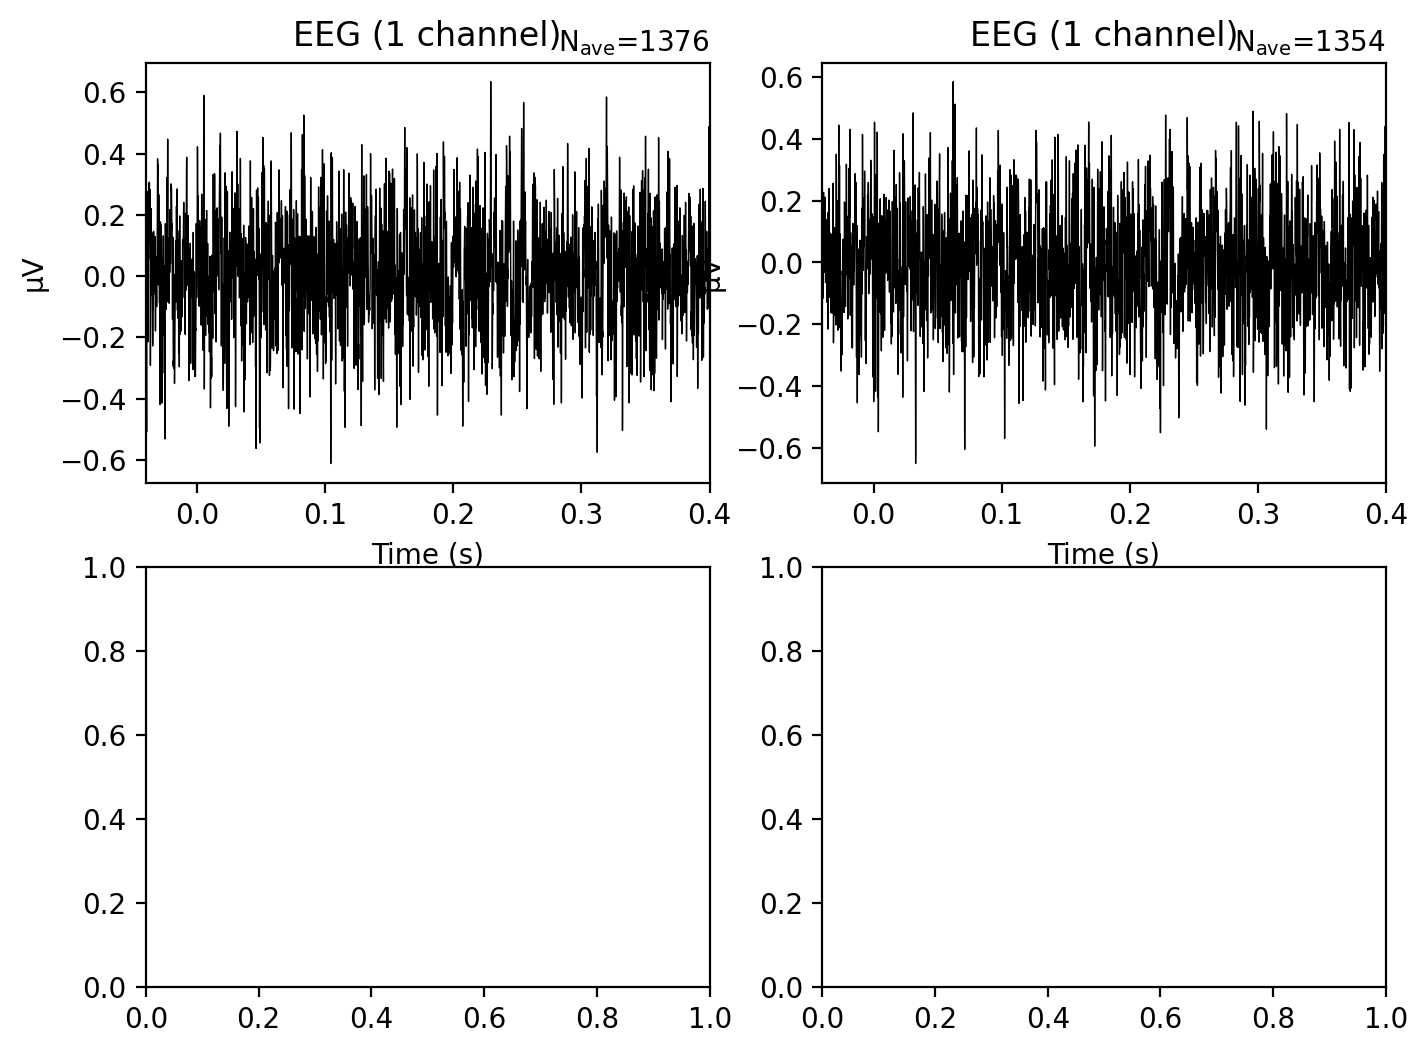

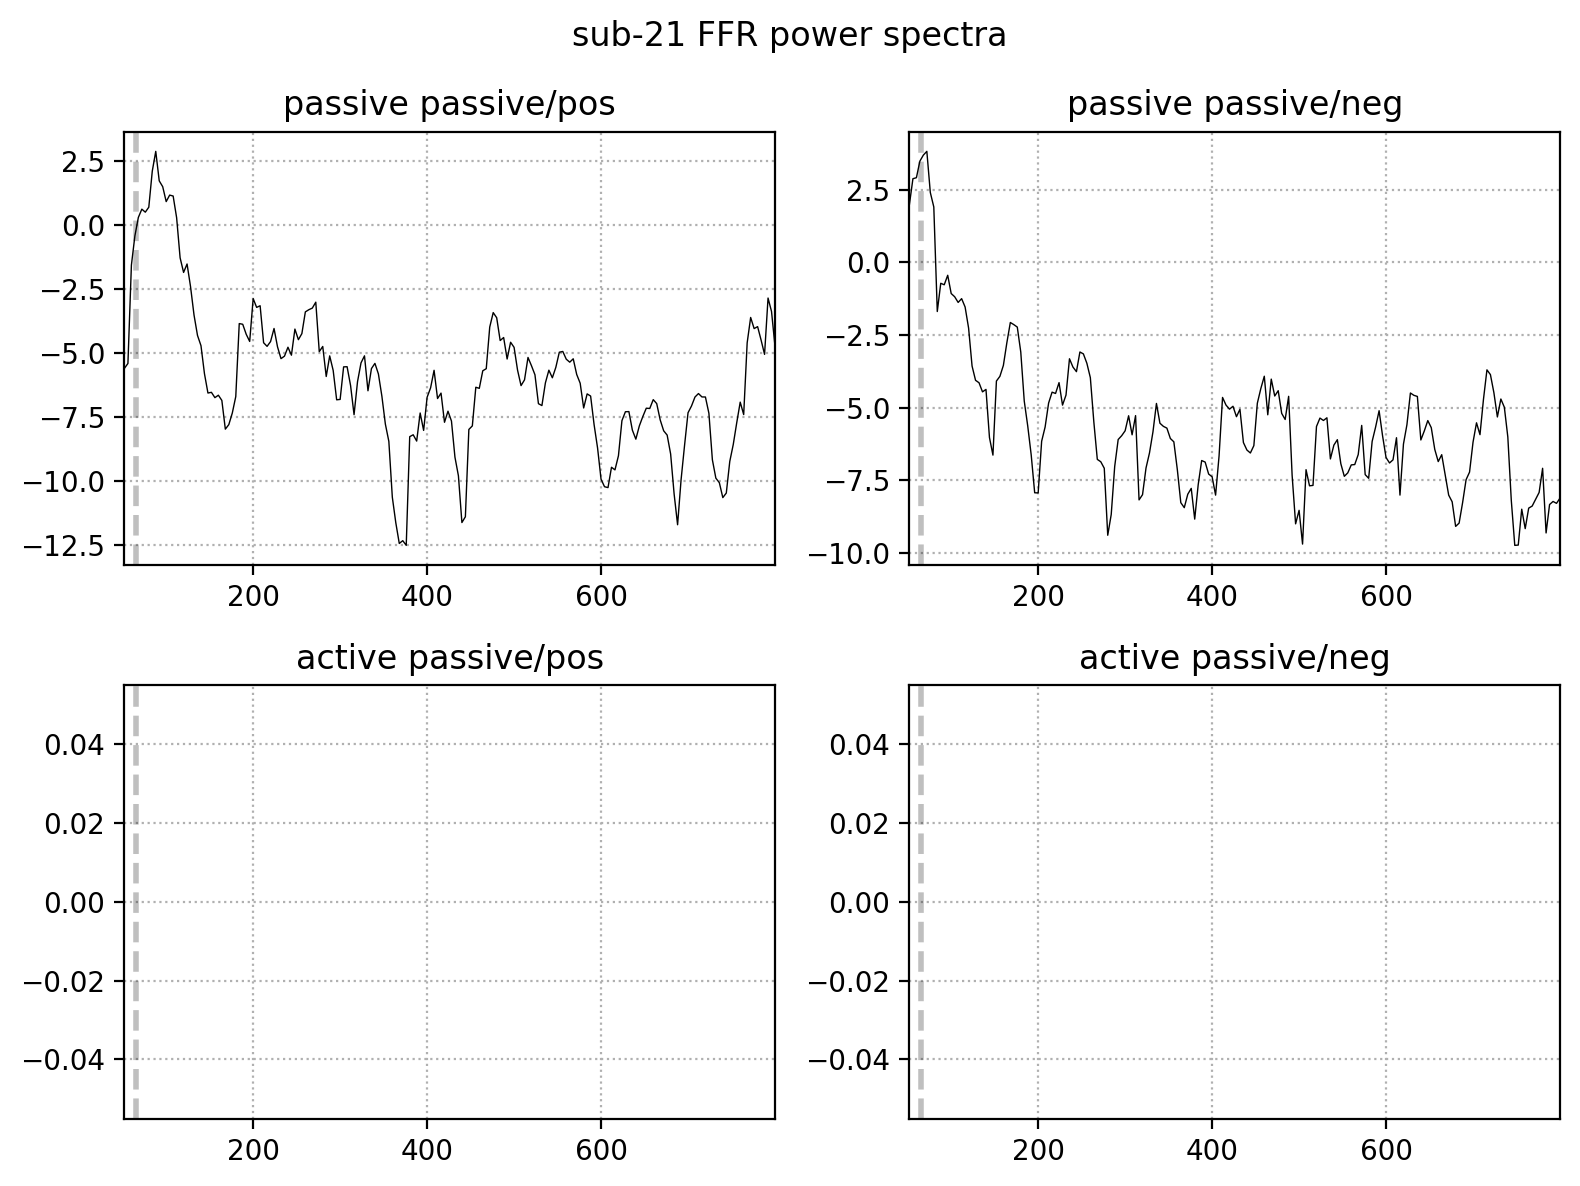

In [96]:
# Power spectra
passive_pos_psd = event_evoked_dict['passive'][0].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
passive_neg_psd = event_evoked_dict['passive'][1].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
active_pos_psd = event_evoked_dict['active'][0].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
active_neg_psd = event_evoked_dict['active'][1].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)

fig, axes = plt.subplots(2, 2, figsize=(8,6), dpi=200)
ax = axes.flatten()
passive_pos_psd.plot(axes=ax[0], amplitude=False, average=True, show=False)
passive_neg_psd.plot(axes=ax[1], amplitude=False, average=True, show=False)
active_pos_psd.plot(axes=ax[2], amplitude=False, average=True, show=False)
active_neg_psd.plot(axes=ax[3], amplitude=False, average=True, show=False)

ax[0].set_title('passive ' + event_evoked_dict['passive'][0].comment);
ax[1].set_title('passive ' + event_evoked_dict['passive'][1].comment);
ax[2].set_title('active ' + event_evoked_dict['active'][0].comment);
ax[3].set_title('active ' + event_evoked_dict['active'][1].comment);

fig.suptitle(f'sub-{sub_label} FFR power spectra')

fig.tight_layout()
plt.show()
#plt.savefig(f'sub-{sub_label}_polarity-single_spectra.svg')

No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied


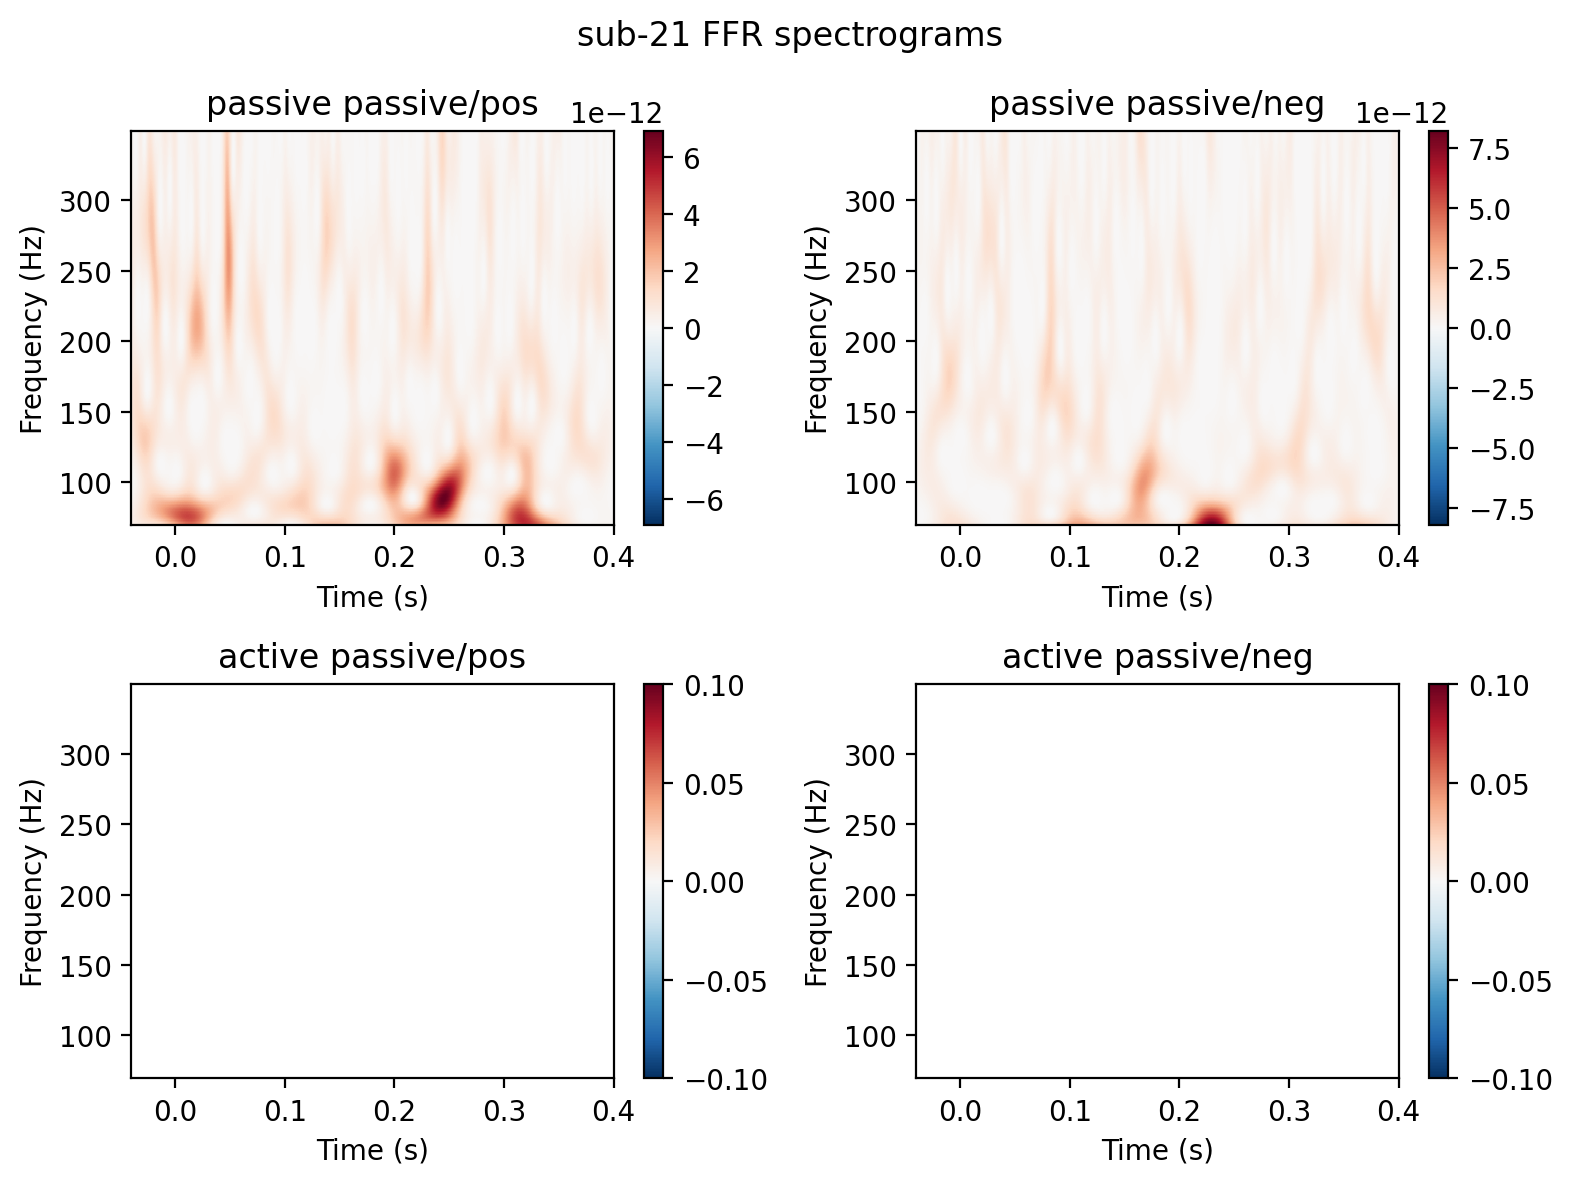

In [97]:
# Spectrograms
frequencies = np.arange(70,350)

passive_pos_power = event_evoked_dict['passive'][0].compute_tfr("morlet", freqs=frequencies)
passive_neg_power = event_evoked_dict['passive'][1].compute_tfr("morlet", freqs=frequencies)
active_pos_power = event_evoked_dict['active'][0].compute_tfr("morlet", freqs=frequencies)
active_neg_power = event_evoked_dict['active'][1].compute_tfr("morlet", freqs=frequencies)

fig, axes = plt.subplots(2, 2, figsize=(8,6), dpi=200)
ax = axes.flatten()
passive_pos_power.plot(axes=ax[0], show=False)
passive_neg_power.plot(axes=ax[1], show=False)
active_pos_power.plot(axes=ax[2], show=False)
active_neg_power.plot(axes=ax[3], show=False)

ax[0].set_title('passive ' + event_evoked_dict['passive'][0].comment);
ax[1].set_title('passive ' + event_evoked_dict['passive'][1].comment);
ax[2].set_title('active ' + event_evoked_dict['active'][0].comment);
ax[3].set_title('active ' + event_evoked_dict['active'][1].comment);

fig.suptitle(f'sub-{sub_label} FFR spectrograms')

fig.tight_layout()
plt.show()
#plt.savefig(f'sub-{sub_label}_polarity-single_spectrograms.svg')

### Plot combined polarities

In [98]:
task_evoked_dict

{'active': <Evoked | '0.00 × passive/pos + 0.00 × passive/neg + 0.50 × active/pos + 0.50 × active/neg' (average, N=3495), -0.039978 – 0.40002 s, baseline -0.04 – 0 s, 1 ch, ~63 KiB>,
 'passive': <Evoked | '0.50 × passive/pos + 0.50 × passive/neg + 0.00 × active/pos + 0.00 × active/neg' (average, N=2730), -0.039978 – 0.40002 s, baseline -0.04 – 0 s, 1 ch, ~63 KiB>}

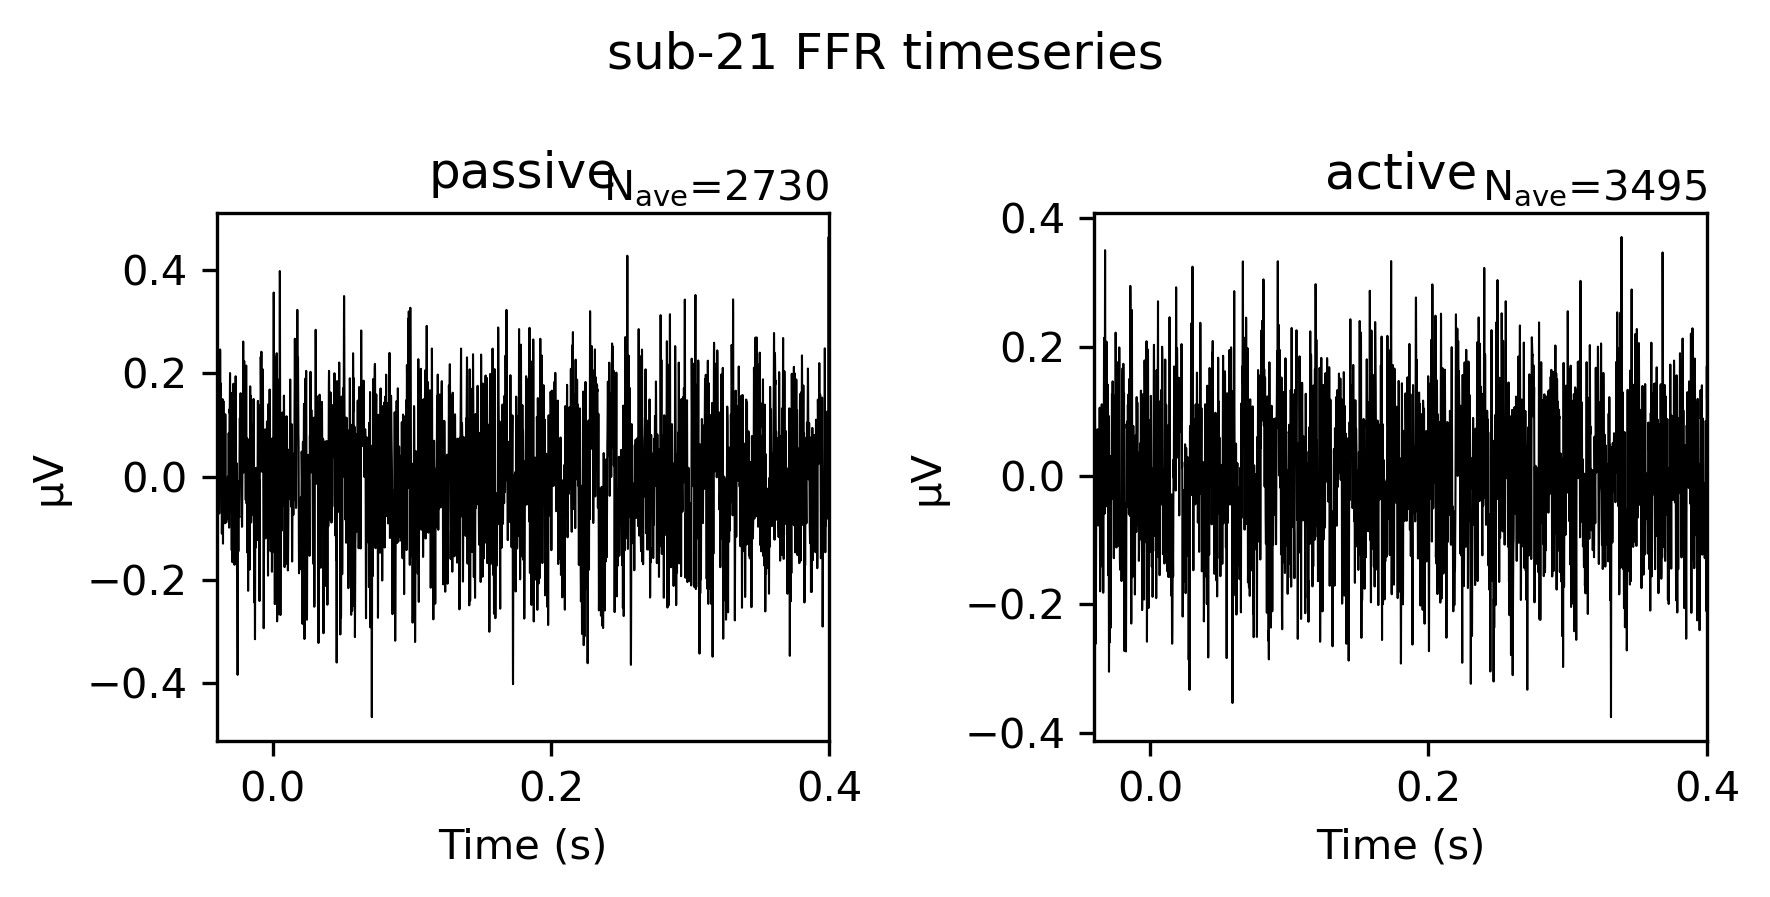

In [99]:
# Waveforms
fig, ax = plt.subplots(1, 2, figsize=(6,3), dpi=300)
task_evoked_dict['passive'].plot(axes=ax[0], selectable=False, show=False)
task_evoked_dict['active'].plot(axes=ax[1], selectable=False, show=False)

ax[0].set_title('passive');
ax[1].set_title('active');

fig.suptitle(f'sub-{sub_label} FFR timeseries')

fig.tight_layout()
plt.show()
plt.savefig(f'sub-{sub_label}_timeseries.svg')

    Using multitaper spectrum estimation with 7 DPSS windows


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


<Figure size 640x480 with 0 Axes>

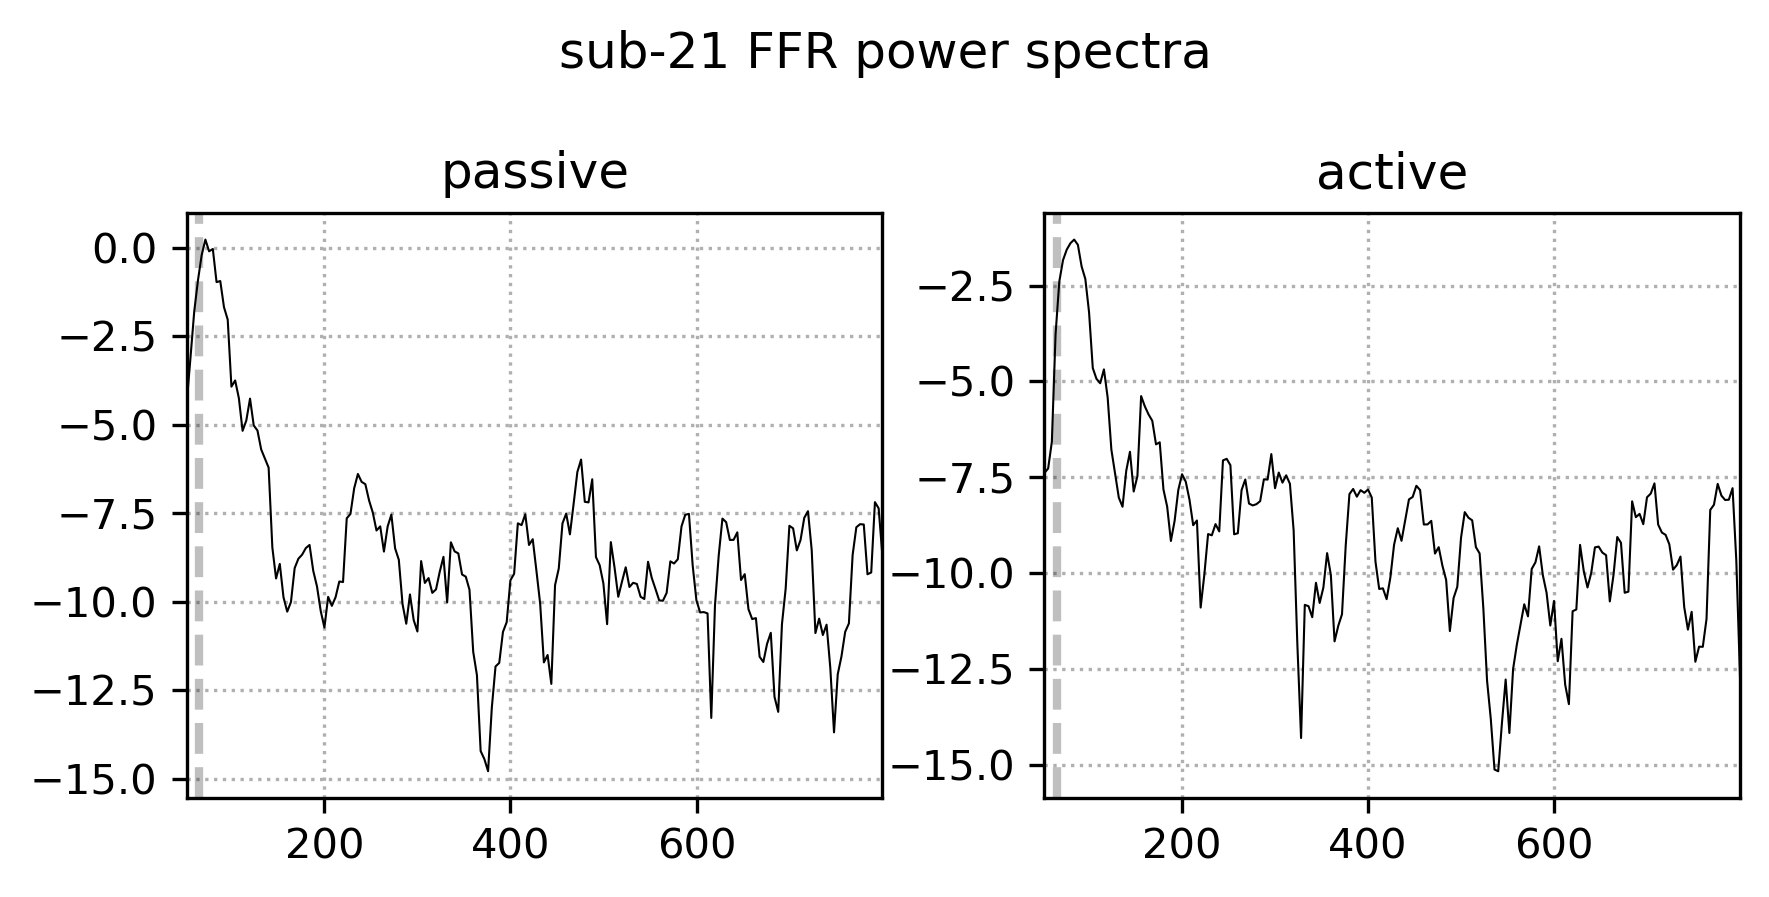

In [100]:
# Power spectra
passive_psd = task_evoked_dict['passive'].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
active_psd = task_evoked_dict['active'].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
fig, ax = plt.subplots(1, 2, figsize=(6,3), dpi=300)
passive_psd.plot(axes=ax[0], amplitude=False, average=True, show=False)
active_psd.plot(axes=ax[1], amplitude=False, average=True, show=False)

ax[0].set_title('passive');
ax[1].set_title('active');

fig.suptitle(f'sub-{sub_label} FFR power spectra')

fig.tight_layout()
plt.show()
plt.savefig(f'sub-{sub_label}_spectra.svg')

No baseline correction applied
No baseline correction applied


<Figure size 640x480 with 0 Axes>

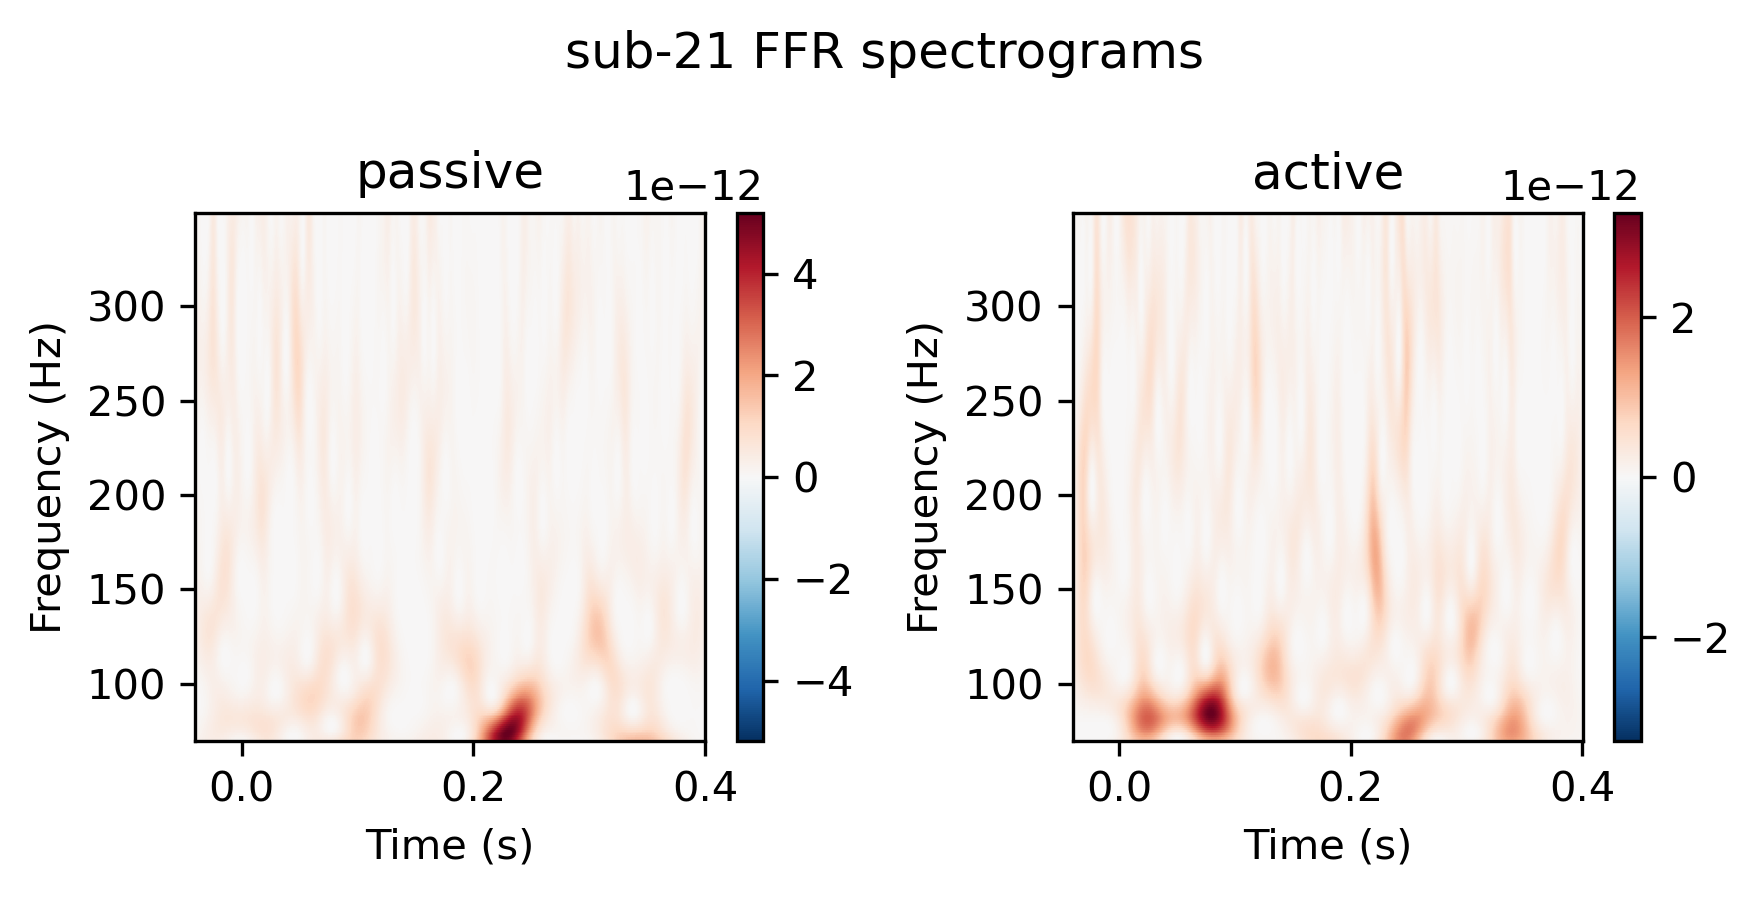

In [101]:
# Spectrograms
frequencies = np.arange(70,350)
active_power =  task_evoked_dict['active'].compute_tfr("morlet", freqs=frequencies)
passive_power =  task_evoked_dict['passive'].compute_tfr("morlet", freqs=frequencies)
fig, ax = plt.subplots(1, 2, figsize=(6,3), dpi=300)
passive_power.plot(axes=ax[0], show=False)
active_power.plot(axes=ax[1], show=False)

ax[0].set_title('passive');
ax[1].set_title('active');

fig.suptitle(f'sub-{sub_label} FFR spectrograms')

fig.tight_layout()
plt.show()
plt.savefig(f'sub-{sub_label}_spectrograms.svg')

# QA and metrics

## RMS SNR

In [76]:
from numpy import mean, sqrt, square, arange

In [78]:
for sx, stim in enumerate(task_evoked_dict):
    s_evoked = task_evoked_dict[stim]
    baseline_ind_bounds = s_evoked.time_as_index(task_evoked_dict[stim].baseline)
    response_ind_bounds = s_evoked.time_as_index([0.05, 0.200])

    evoked_baseline = s_evoked.data[0,baseline_ind_bounds[0]:baseline_ind_bounds[1]]
    evoked_response = s_evoked.data[0,response_ind_bounds[0]:response_ind_bounds[1]]
    rms_baseline = sqrt(mean(square(evoked_baseline)))
    rms_response = sqrt(mean(square(evoked_response)))

    rms_snr = rms_response / rms_baseline

    print(f'{stim} RMS SNR: {rms_snr:.04f}')
print(f'\nMean RMS SNR: {rms_snr.mean():.04f}' )

active RMS SNR: 0.9412
passive RMS SNR: 1.5903
motor RMS SNR: 0.8907

Mean RMS SNR: 0.8907


## [IN PREP] Autocorrelation

In [42]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [43]:
acf, confint = sm.tsa.stattools.acf(all_evoked.data[0,:], 
                                    nlags=len(all_evoked.data[0,:])-1,
                                    alpha=.05)

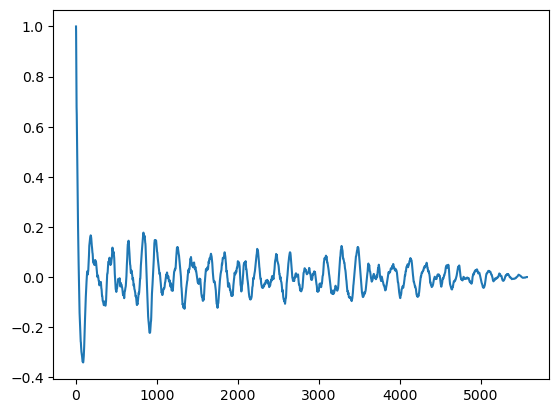

In [44]:
plt.plot(acf)
plt.show()

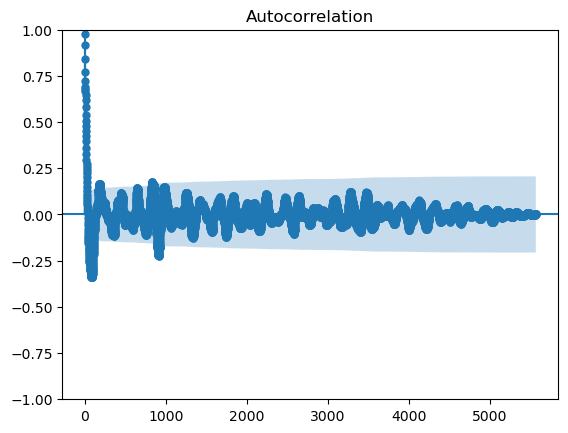

In [45]:
sm.graphics.tsa.plot_acf(all_evoked.data[0,:], 
                         lags=len(all_evoked.data[0,:])-1, 
                         zero=False,)

## [IN PREP] Stimulus–response correlations


In [46]:
data.pick(['Erg1'])

Measurement date,"July 18, 2024 13:12:19 GMT"
Experimenter,Unknown
Participant,
Digitized points,Not available
Good channels,1 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,16384.00 Hz
Highpass,0.00 Hz
Lowpass,3334.00 Hz


In [47]:
# epoch data based on stimulus events
stim_epochs = mne.Epochs(data_filtered, 
                    events, 
                    event_id=event_dict,
                    picks=['Erg1'],
                    tmin=-0.04, tmax=0.3, 
                    baseline=[-0.04, 0],
                    #reject = dict(eeg = 35e-6)).drop_bad()
                    reject=dict(eeg=75)).drop_bad()

Not setting metadata
1170 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1170 events and 5571 original time points ...
0 bad epochs dropped


In [48]:
stim_epochs

Number of events,1170
Events,button_press: 1170
Time range,-0.040 – 0.300 s
Baseline,-0.040 – 0.000 s


In [49]:
stim_epochs.average()

Condition,button_press
Data kind,average
Timepoints,5571 samples
Channels,1 channels
Number of averaged epochs,1170
Time range (secs),-0.03997802734375 – 0.29998779296875
Baseline (secs),-0.040 – 0.000 s


Need more than one channel to make topography for eeg. Disabling interactivity.


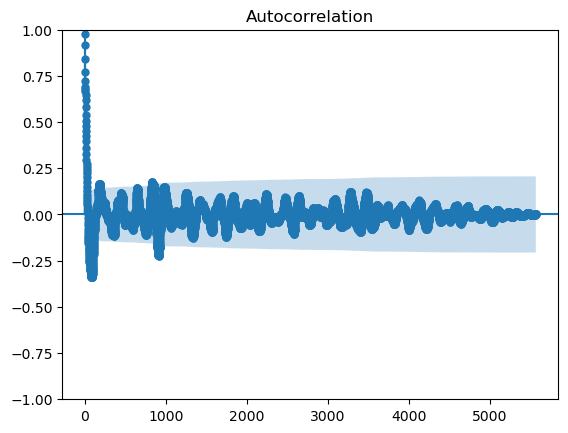

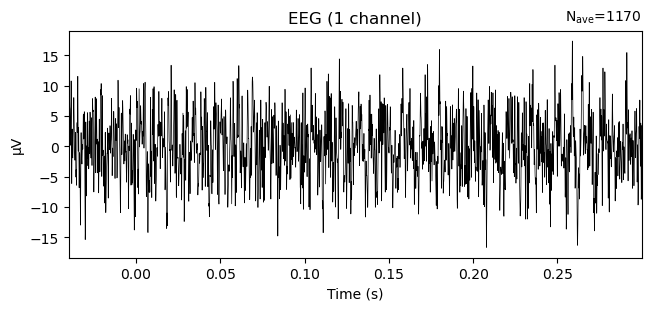

In [50]:
stim_epochs.average().plot();

In [51]:
stim_data = stim_epochs.average().get_data()[0,:]
active_data = task_evoked_dict['active'].get_data()[0,:]
passive_data = task_evoked_dict['passive'].get_data()[0,:]

In [78]:
np.array(range(len(stim_data)))

array([   0,    1,    2, ..., 5568, 5569, 5570])

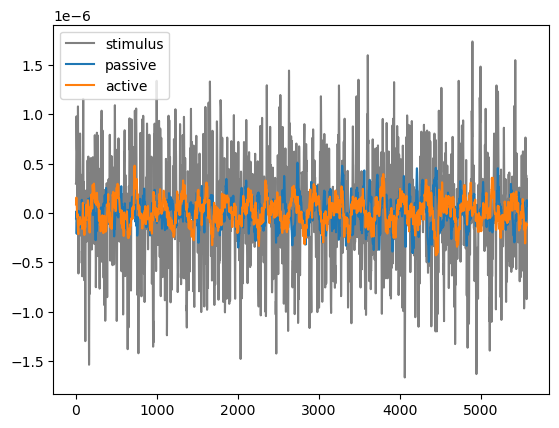

In [86]:
plt.plot(stim_data/10, color='grey')
plt.plot(passive_data)
plt.plot(active_data)
plt.legend(['stimulus','passive','active'])
#plt.xaxis(np.array(range(len(stim_data)))/16384)
plt.show()

In [52]:
from scipy.stats import spearmanr
active_res = spearmanr(active_data, stim_data, alternative='greater')
passive_res = spearmanr(passive_data, stim_data, alternative='greater')


In [53]:
active_res

SignificanceResult(statistic=0.013488523482214512, pvalue=0.15706554806619186)

In [54]:
passive_res

SignificanceResult(statistic=-0.0022353155565718644, pvalue=0.5662381718955769)